# Goalkeeper Impact on Winning Streaks

### Data Divers Group Project

**Research Question #2**: *How does the importance of goalkeepers contribute to winning streaks?*

This notebook explores how goalkeeper performance influences team success, particularly focusing on winning streaks in the FIFA World Cup dataset.

In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# Set up visual style
sns.set(style='whitegrid')

In [27]:
# Load dataset
fifa_df = pd.read_csv('/Users/brian/Desktop//DataDivers_Group_Repo/workinprogress/fifa_world_cup.csv')


In [31]:
# Print the shape fo the DataFrame and the colun names
print("Shape of the dataset:", fifa_df.shape)
print("columns in the dataset:", fifa_df.columns.tolist())

Shape of the dataset: (23921, 25)
columns in the dataset: ['date', 'home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 'neutral_location', 'shoot_out', 'home_team_result', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


## Step 1: Data Overview and Goalkeeper-Related Features
We'll start by examining the dataset and identifying columns related to goalkeepers, such as saves, goals conceded, clean sheets, etc.

In [35]:
# Display dataset columns and check for goalkeeper-related features
fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

### We'll explore columns such as:
- `clean_sheets`
- `saves`
- `goals_conceded`

(If these columns aren't present, we'll adjust based on available data.)

## Step 2: Define Winning Streaks
We'll identify teams that have achieved winning streaks across tournaments.

In [39]:
# Step: Compute Wins and Goalkeeper Scores

# Assign win result as 1 for win, 0 for not win (draw/loss)
fifa_df['home_win'] = fifa_df['home_team_result'].apply(lambda x: 1 if x == 'Win' else 0)
fifa_df['away_win'] = fifa_df['home_team_result'].apply(lambda x: 1 if x == 'Lose' else 0)

# Create long format for analysis
home_df = fifa_df[['date', 'home_team', 'home_win', 'home_team_goalkeeper_score']].copy()
home_df.columns = ['date', 'team', 'win', 'goalkeeper_score']

away_df = fifa_df[['date', 'away_team', 'away_win', 'away_team_goalkeeper_score']].copy()
away_df.columns = ['date', 'team', 'win', 'goalkeeper_score']

combined_df = pd.concat([home_df, away_df])

# Aggregate wins and average goalkeeper score per team
team_stats = combined_df.groupby('team').agg({
    'win': 'sum',
    'goalkeeper_score': 'mean'
}).reset_index()

team_stats = team_stats.rename(columns={'win': 'total_wins', 'goalkeeper_score': 'avg_goalkeeper_score'})
team_stats.sort_values(by='total_wins', ascending=False).head()

,team,total_wins,avg_goalkeeper_score
27,Brazil,301,86.261224
124,Mexico,272,79.188498
174,Spain,246,88.784810
198,USA,242,81.078292
75,Germany,240,89.053719


## Step 3: Correlation Analysis
We'll analyze how goalkeeper stats correlate with win totals.

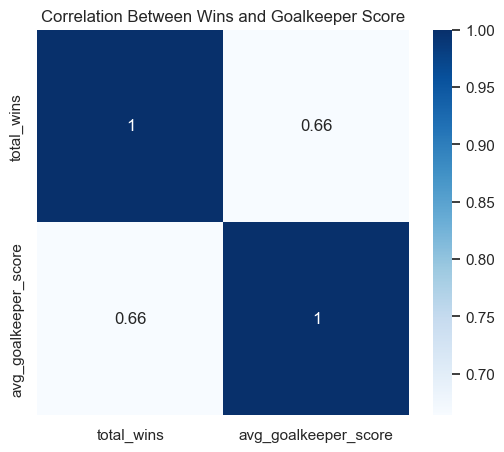

In [43]:
# Correlation between goalkeeper performance and wins
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(team_stats[['total_wins', 'avg_goalkeeper_score']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Wins and Goalkeeper Score')
plt.show()


## Step 4: Visualizations
Visualize clean sheets and saves against win totals.

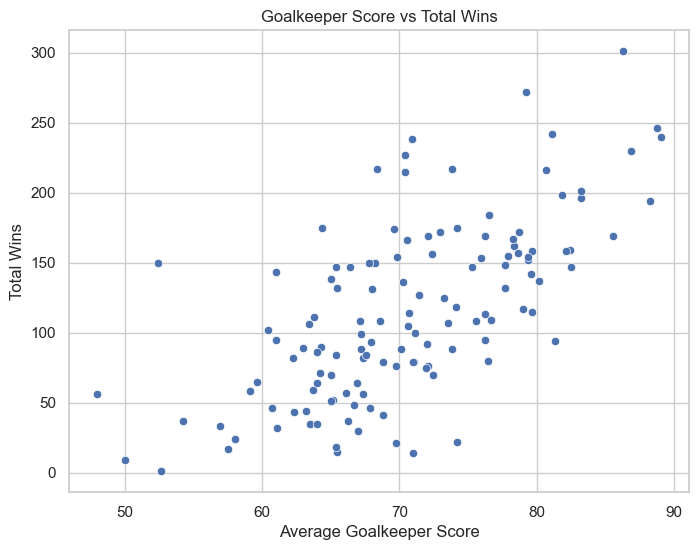

In [45]:
# Plot: Avg Goalkeeper Score vs Wins
plt.figure(figsize=(8,6))
sns.scatterplot(data=team_stats, x='avg_goalkeeper_score', y='total_wins')
plt.title('Goalkeeper Score vs Total Wins')
plt.xlabel('Average Goalkeeper Score')
plt.ylabel('Total Wins')
plt.show()

/var/folders/j9/f944ff654776g8yhwmjhh2t00000gn/T/ipykernel_4504/304903742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='avg_goalkeeper_score', y='team', palette='viridis')


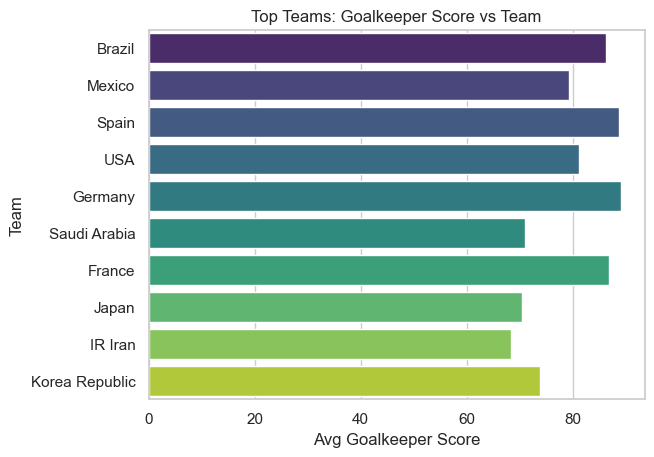

In [47]:
# Highlight Top Performing Teams
top_teams = team_stats.sort_values(by='total_wins', ascending=False).head(10)
sns.barplot(data=top_teams, x='avg_goalkeeper_score', y='team', palette='viridis')
plt.title('Top Teams: Goalkeeper Score vs Team')
plt.xlabel('Avg Goalkeeper Score')
plt.ylabel('Team')
plt.show()

## Step 5: Conclusion
Based on our analysis, we can interpret the importance of goalkeeper performance in contributing to winning streaks in the World Cup.

We'll summarize key findings here once the full analysis is done.